# Project: Stears Data Analysis Assessment


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Profiling and Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction
Project Steps Overview
Your tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

your data wrangling efforts
your data analyses and visualizations

In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/USER/Desktop/Stears Data Analysis Project/full_stears_updated_data.csv')

# Data Profiling and Wrangling

A glimpse into the dataset

In [4]:
df.head()

,id,status,currency,country_code,country_name
0,1,failed,USD,US,United States
1,2,success,NGN,NG,Nigeria
2,3,abandoned,NGN,NaN,NaN
3,4,success,NGN,NG,Nigeria
4,5,abandoned,NGN,NG,Nigeria


In [5]:
df.tail()

,id,status,currency,country_code,country_name
3271,3272,abandoned,NGN,NaN,NaN
3272,3273,abandoned,NGN,NG,Nigeria
3273,3274,abandoned,NGN,NaN,NaN
3274,3275,abandoned,USD,NaN,NaN
3275,3276,success,NGN,NG,Nigeria


NB: I had done preliminary cleaning in Google sheet and Microsoft excel prior to this point. 
Since the dataset is not too large, I manually created addition feature (country_name) to aid analysis.
Link: https://docs.google.com/spreadsheets/d/1Q7VSWzdgQj5yTzsy1BYwGRvwxgY5oCy_4jNTuWq4_UI/edit?usp=sharing

# Quality Issues
country_code and country_name have missing values
Empty/Null values are stored as NaN and should be identified and replaced.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3276 non-null   int64 
 1   status        3276 non-null   object
 2   currency      3276 non-null   object
 3   country_code  1960 non-null   object
 4   country_name  1962 non-null   object
dtypes: int64(1), object(4)
memory usage: 128.1+ KB


The above code gives a more detailed information about our data types.
All except the id (int64, an integer) variables (column) are object (string) data type.

In [7]:
df.isna().sum()

id                 0
status             0
currency           0
country_code    1316
country_name    1314
dtype: int64

From the above analysis, it is seen that there are a lot of missing values in the country_code and country_name columns

In [8]:
df.shape

(3276, 5)

There are 3276 observations and 5 columns

In [9]:
len(df)

3276

# Exploratory Data Analysis and Visualization

In [10]:
df.status.value_counts()

abandoned    1454
success      1352
failed        429
reversed       41
Name: status, dtype: int64

In [11]:
df.currency.value_counts()

NGN    2788
USD     488
Name: currency, dtype: int64

In [12]:
df.country_name.value_counts()

Nigeria                1582
United States           210
United Kingdom          108
Canada                   17
Kenya                     5
South Africa              5
Ireland                   5
Ghana                     4
Bangladesh                3
Uganda                    3
Japan                     3
France                    3
canada                    2
United Arab Emirate       2
Italy                     2
Qatar                     1
Norway                    1
Cayman Islands            1
Ukraine                   1
Poland                    1
Cameroon                  1
Namibia                   1
Australia                 1
Name: country_name, dtype: int64

<AxesSubplot:>

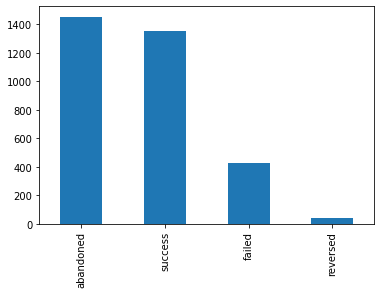

In [13]:
df['status'].value_counts().plot(kind='bar')

From the above visual, it is clear that:
1. Exactly 1,454 payments were abandoned by the customers. This accounts for 44.4% of the data.
2. Exactly 1,352 payments were successful. This accounts for 41.3% of the data.
3. Exactly 429 payments failed. This accounts for 13.1% of the data.
4. Exactly 41 payments were reversed. This accounts for 1.3% of the data.

<AxesSubplot:>

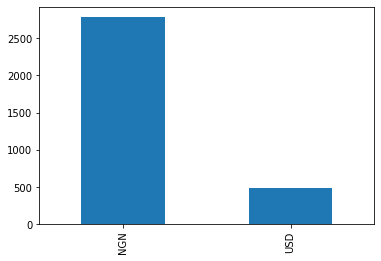

In [14]:
df['currency'].value_counts().plot(kind='bar')

From the above visual, we can see that:
1. Naira (NGN) accounted for 85.1% (2788 counts) of the total payments made for subscription.
2. Dollars (USD) accounted for 14.9 (488 counts) of the total payments made for subscription.

<AxesSubplot:>

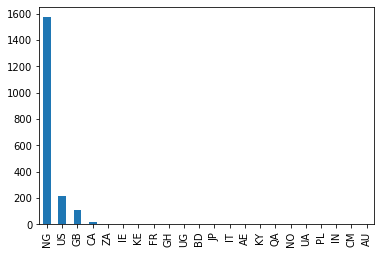

In [15]:
df['country_code'].value_counts().plot(kind='bar')

<AxesSubplot:>

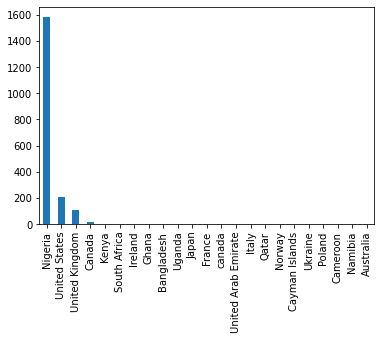

In [16]:
df['country_name'].value_counts().plot(kind='bar')

From the last two visuals above, we can see that:
1. Majority of our subscribers are from Nigeria. This accounts for almost 1600 of the total customer base.
2. United States follow with a littl bit above 200 subscribers.
3. Next is United Kingdom and lastly, Canada. The rest is shared among the rest of the countries.

In [17]:
df.drop(['country_code'], axis=1, inplace=True)

In [18]:
df.head()

,id,status,currency,country_name
0,1,failed,USD,United States
1,2,success,NGN,Nigeria
2,3,abandoned,NGN,NaN
3,4,success,NGN,Nigeria
4,5,abandoned,NGN,Nigeria


In [19]:
#Save a copy of the data df to df_new
df_new = df.copy()

In [20]:
# Decoding the status variable. Set success to 1, others to 0
df_new.status = np.where(df_new.status == "success", 1, 0)
df_new.status.value_counts()

0    1924
1    1352
Name: status, dtype: int64

In [21]:
# Checking to confirm the encoding is done
df_new.head()

,id,status,currency,country_name
0,1,0,USD,United States
1,2,1,NGN,Nigeria
2,3,0,NGN,NaN
3,4,1,NGN,Nigeria
4,5,0,NGN,Nigeria


In [22]:
df_new.drop(['id'], axis=1, inplace=True)

In [23]:
df_new.head()

,status,currency,country_name
0,0,USD,United States
1,1,NGN,Nigeria
2,0,NGN,NaN
3,1,NGN,Nigeria
4,0,NGN,Nigeria


In [24]:
# Query all rows with status equals 0 (This contained the abandoned, failed, and reversed payments)
df_new.query("status == 0")
print(df_new)


      status currency   country_name
0          0      USD  United States
1          1      NGN        Nigeria
2          0      NGN            NaN
3          1      NGN        Nigeria
4          0      NGN        Nigeria
...      ...      ...            ...
3271       0      NGN            NaN
3272       0      NGN        Nigeria
3273       0      NGN            NaN
3274       0      USD            NaN
3275       1      NGN        Nigeria

[3276 rows x 3 columns]


In [25]:
# Query Rows by list of values
df2 = print(df_new.query("country_name in ('United Arab Emirates','Australia','Bangladesh', 'Canada','Cameroon','France','United Kingdom', 'Ghana','Ireland','India','Italy','Japan','Kenya','Cayman Islands','Namibia','Nigeria','Norway','not found','Poland','Qatar','Uganda','United States','South Africa')"))

      status currency   country_name
0          0      USD  United States
1          1      NGN        Nigeria
3          1      NGN        Nigeria
4          0      NGN        Nigeria
6          1      NGN        Nigeria
...      ...      ...            ...
3266       1      USD  United States
3267       1      NGN        Nigeria
3270       0      USD         France
3272       0      NGN        Nigeria
3275       1      NGN        Nigeria

[1957 rows x 3 columns]


In [26]:
"""
Query all rows with status equals 0, i.e not successful (This contained the abandoned, failed, and reversed payments)
where country_name is not Nigeria and currency is not Naira
"""
df3= df_new.query("status == 0 and country_name != 'Nigeria' and currency != 'NGN'")
print(df3)

      status currency   country_name
0          0      USD  United States
7          0      USD            NaN
11         0      USD  United States
18         0      USD  United States
19         0      USD  United States
...      ...      ...            ...
3246       0      USD            NaN
3262       0      USD  United States
3265       0      USD            NaN
3270       0      USD         France
3274       0      USD            NaN

[325 rows x 3 columns]


<AxesSubplot:xlabel='status,currency,country_name'>

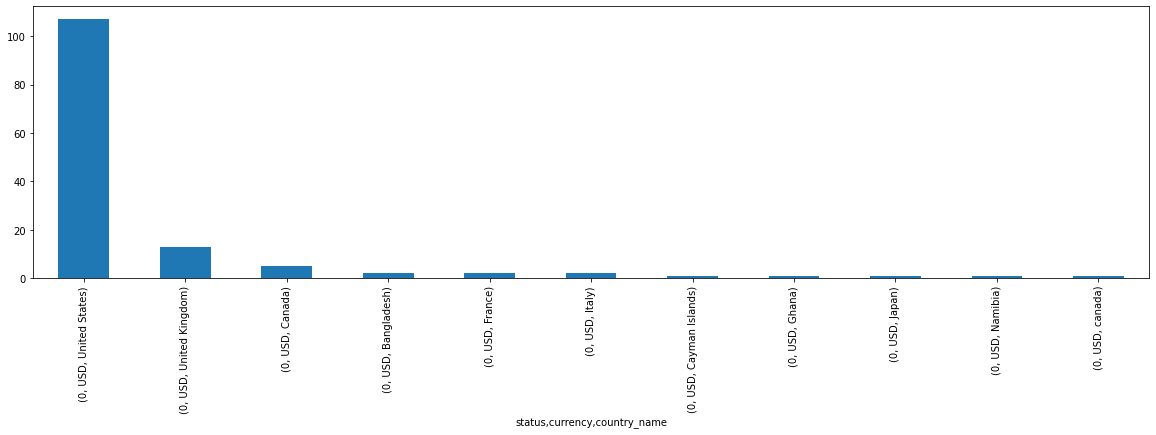

In [27]:
df3.value_counts().plot(kind='bar', figsize = (20,5))

In [28]:
"""
Query all rows with status equals 0, i.e not successful (This contained the abandoned, failed, and reversed payments)
where country_name is not Nigeria and currency is Naira
"""
df4 = df_new.query("status == 0 and country_name != 'Nigeria' and currency == 'NGN'")
print(df4)

      status currency country_name
2          0      NGN          NaN
5          0      NGN          NaN
8          0      NGN          NaN
9          0      NGN          NaN
16         0      NGN          NaN
...      ...      ...          ...
3263       0      NGN          NaN
3268       0      NGN          NaN
3269       0      NGN          NaN
3271       0      NGN          NaN
3273       0      NGN          NaN

[1174 rows x 3 columns]


<AxesSubplot:xlabel='status,currency,country_name'>

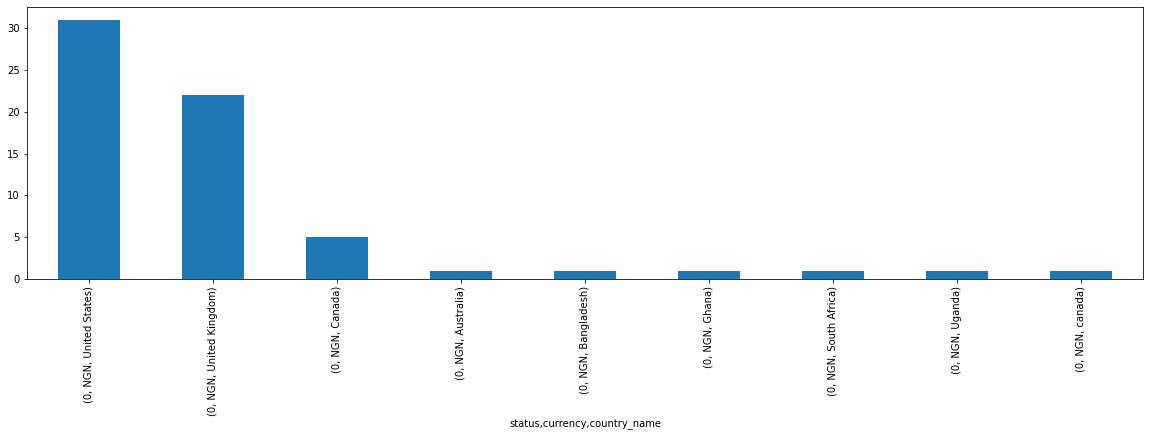

In [29]:
df4.value_counts().plot(kind='bar', figsize = (20,5))

In [30]:
"""
Query all rows with status equals 0, i.e not successful (This contained the abandoned, failed, and reversed payments)
where country_name is Nigeria and currency is not Naira
"""
df5 = df_new.query("status == 0 and country_name == 'Nigeria' and currency != 'NGN'")
print(df5)

      status currency country_name
196        0      USD      Nigeria
458        0      USD      Nigeria
576        0      USD      Nigeria
936        0      USD      Nigeria
1020       0      USD      Nigeria
1129       0      USD      Nigeria
1156       0      USD      Nigeria
1277       0      USD      Nigeria
1520       0      USD      Nigeria
1529       0      USD      Nigeria
1639       0      USD      Nigeria
1718       0      USD      Nigeria
1728       0      USD      Nigeria
2101       0      USD      Nigeria
2303       0      USD      Nigeria
2457       0      USD      Nigeria
2708       0      USD      Nigeria
2728       0      USD      Nigeria
2904       0      USD      Nigeria
3201       0      USD      Nigeria
3258       0      USD      Nigeria


<AxesSubplot:xlabel='status,currency,country_name'>

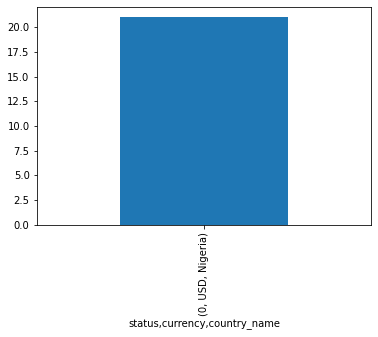

In [31]:
df5.value_counts().plot(kind='bar')

In [32]:
df.head()

,id,status,currency,country_name
0,1,failed,USD,United States
1,2,success,NGN,Nigeria
2,3,abandoned,NGN,NaN
3,4,success,NGN,Nigeria
4,5,abandoned,NGN,Nigeria


In [33]:
"""
Query all rows with status, both successful and failed (This contained the abandoned, failed, and reversed payments)
where country_name is not Nigeria and currency is Naira. 
NB: This answers the research question 
"""
df6 = df_new.query("status and country_name != 'Nigeria' and currency == 'NGN'")
print(df6)

      status currency    country_name
20         1      NGN   United States
47         1      NGN  United Kingdom
52         1      NGN  United Kingdom
56         1      NGN             NaN
66         1      NGN             NaN
...      ...      ...             ...
2879       1      NGN          Canada
2957       1      NGN   United States
3070       1      NGN  United Kingdom
3121       1      NGN  United Kingdom
3254       1      NGN   United States

[61 rows x 3 columns]


<AxesSubplot:xlabel='status,currency,country_name'>

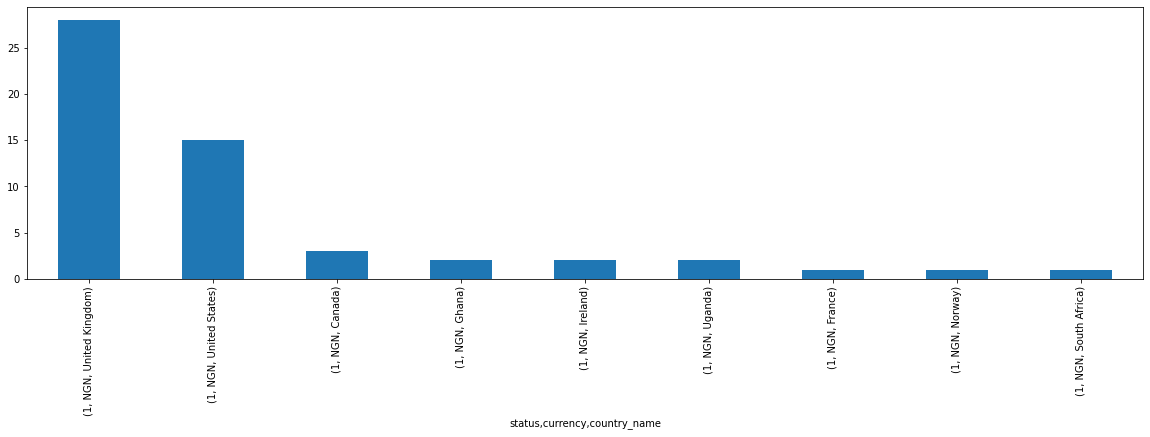

In [34]:
df6.value_counts().plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='currency,country_name'>

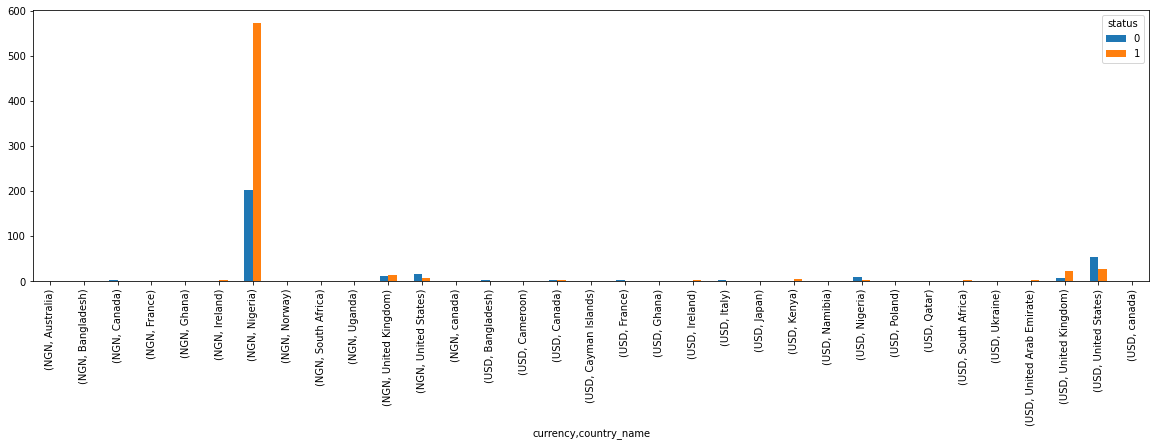

In [35]:
df_new.groupby(["currency", "country_name", "status"]).size().unstack().apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='currency,country_name'>

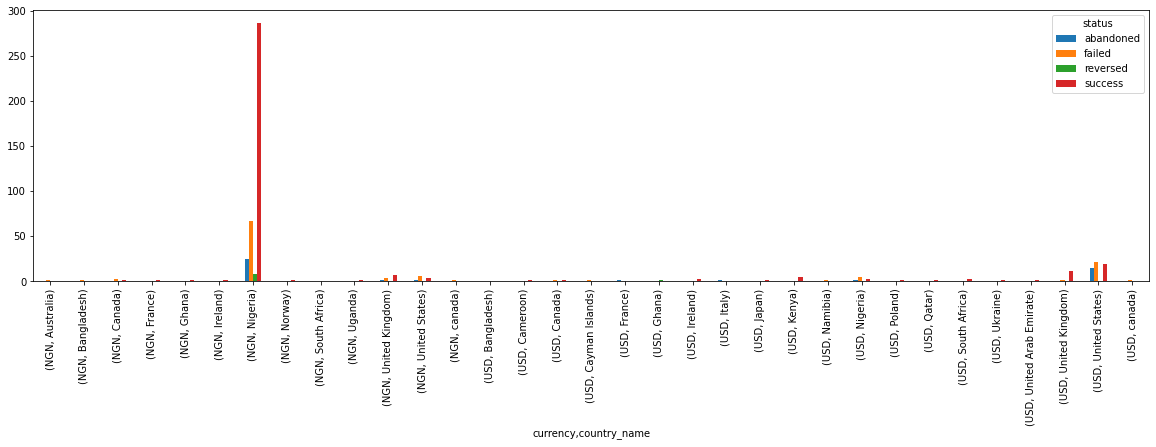

In [36]:
df.groupby(["currency", "country_name", "status"]).size().unstack().apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

In [37]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [38]:
missing_value_df

,column_name,percent_missing
id,id,0.00000
status,status,0.00000
currency,currency,0.00000
country_name,country_name,40.10989


In [39]:
percent_not_missing = df.notnull().sum() * 100 / len(df)
not_missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_not_missing})

In [40]:
not_missing_value_df

,column_name,percent_missing
id,id,100.00000
status,status,100.00000
currency,currency,100.00000
country_name,country_name,59.89011


From the above block of code, we can see that over 40 percent of the observations of the country_code column are missing.

In [41]:
df.nunique()

id              3276
status             4
currency           2
country_name      23
dtype: int64

There are only two unique currency in the data set, names NGN (Naira) and USD (Dollar)
However, there are 22 unique 

<AxesSubplot:xlabel='currency,country_name'>

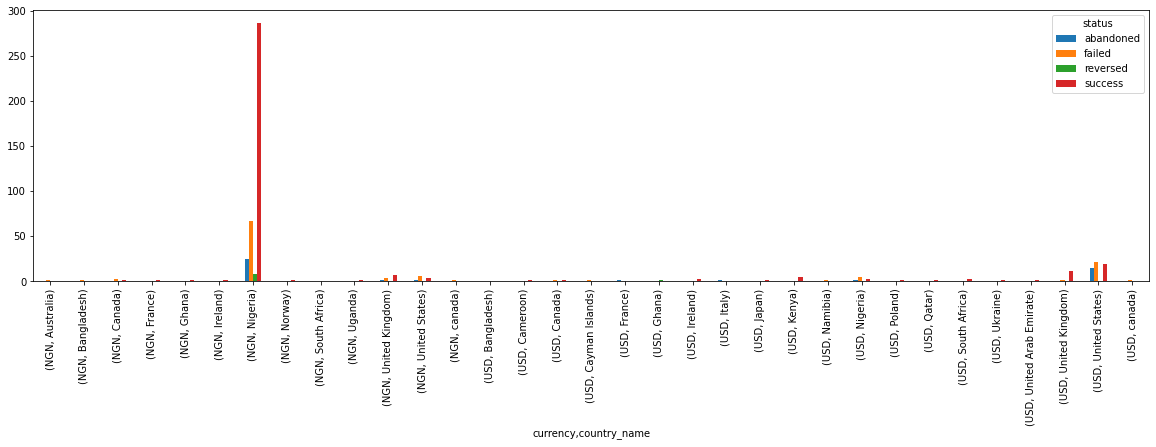

In [42]:
df.groupby(["currency", "country_name", "status"]).size().unstack().apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

# Analysis using cleaned data

In [43]:
df = pd.read_csv('C:/Users/USER/Desktop/Stears Data Analysis Project/no_null_paystack_checkout_transactions.csv')

In [44]:
df.head()

,id,status,currency,country_code,country_name
0,1,failed,USD,US,United States
1,2,success,NGN,NG,Nigeria
2,4,success,NGN,NG,Nigeria
3,5,abandoned,NGN,NG,Nigeria
4,7,success,NGN,NG,Nigeria


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1961 non-null   int64 
 1   status        1961 non-null   object
 2   currency      1961 non-null   object
 3   country_code  1959 non-null   object
 4   country_name  1961 non-null   object
dtypes: int64(1), object(4)
memory usage: 76.7+ KB


In [46]:
df.isna().sum()

id              0
status          0
currency        0
country_code    2
country_name    0
dtype: int64

There are two missing values in the country_code column

In [47]:
df.shape

(1961, 5)

In [48]:
df.duplicated().sum()

0

No duplicate entry in our data

<AxesSubplot:>

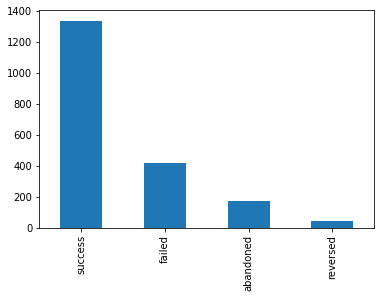

In [49]:
df['status'].value_counts().plot(kind='bar')

From the above graph, it can be seen that almost 1,400 subscriptions were successful, 
while over 400 failed, almost 200 were abandoned abd the rest were reversed.

<AxesSubplot:>

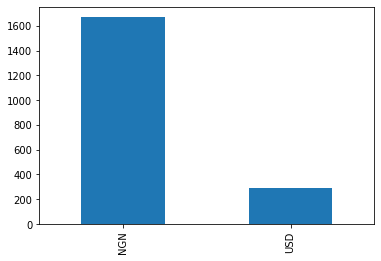

In [50]:
df['currency'].value_counts().plot(kind='bar')

From the above graph, it can be seen that over 1, 600 subscriptions was done in Naira, 
while over 200 were done in Dollar.

<AxesSubplot:>

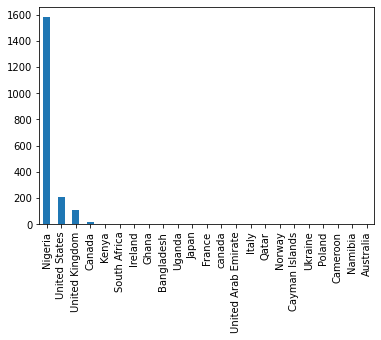

In [51]:
df['country_name'].value_counts().plot(kind='bar')

From the last two visuals above, we can see that:
1. Majority of our subscribers are from Nigeria. This accounts for almost 1600 of the total customer base.
2. United States follow with a littl bit above 200 subscribers.
3. Next is United Kingdom and lastly, Canada. The rest is shared among the rest of the countries.

In [52]:
df2 = df.copy()

In [53]:
df2.head()

,id,status,currency,country_code,country_name
0,1,failed,USD,US,United States
1,2,success,NGN,NG,Nigeria
2,4,success,NGN,NG,Nigeria
3,5,abandoned,NGN,NG,Nigeria
4,7,success,NGN,NG,Nigeria


In [54]:
# Drop id and country_code columns since they are not relevant to our analysis
df2.drop(['id'], axis=1, inplace=True)
#df2.drop(['id', 'country_code'], axis=1, inplace = True)

In [55]:
df2.head()

,status,currency,country_code,country_name
0,failed,USD,US,United States
1,success,NGN,NG,Nigeria
2,success,NGN,NG,Nigeria
3,abandoned,NGN,NG,Nigeria
4,success,NGN,NG,Nigeria


In [56]:
df2.status = np.where(df2.status == "success", 1, 0)
df2.status.value_counts()

1    1336
0     625
Name: status, dtype: int64

In [57]:
df2.isna().sum()

status          0
currency        0
country_code    2
country_name    0
dtype: int64

In [58]:
#Dropping unnecessary column
df2.drop(['country_code'], axis=1, inplace=True)

In [59]:
df2.head(2)

,status,currency,country_name
0,0,USD,United States
1,1,NGN,Nigeria


In [60]:
df2.isna().sum()

status          0
currency        0
country_name    0
dtype: int64

No missing values anymore.

<AxesSubplot:xlabel='currency,country_name,status'>

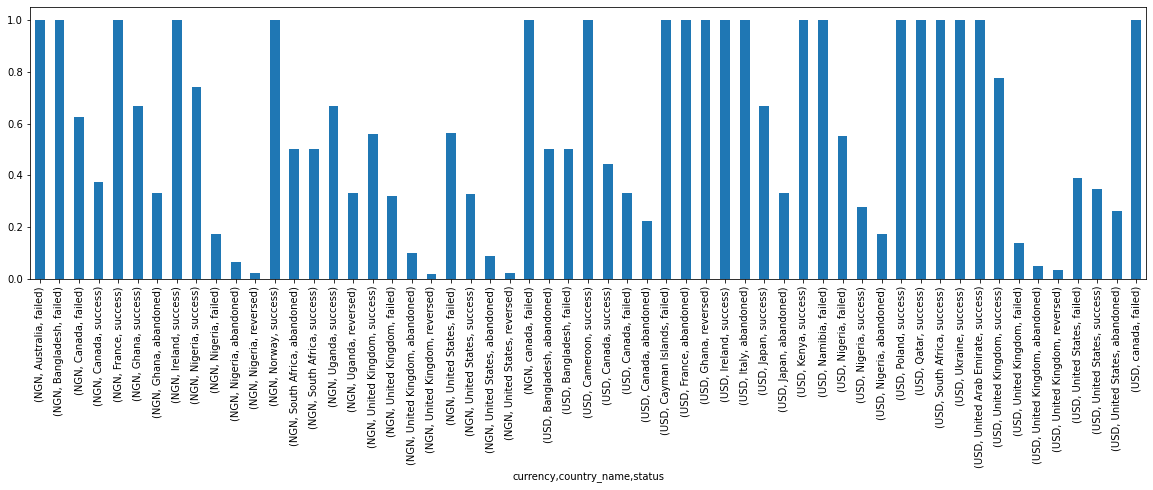

In [61]:
df.groupby(['currency', 'country_name']).status.value_counts(normalize=True).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='currency,country_name'>

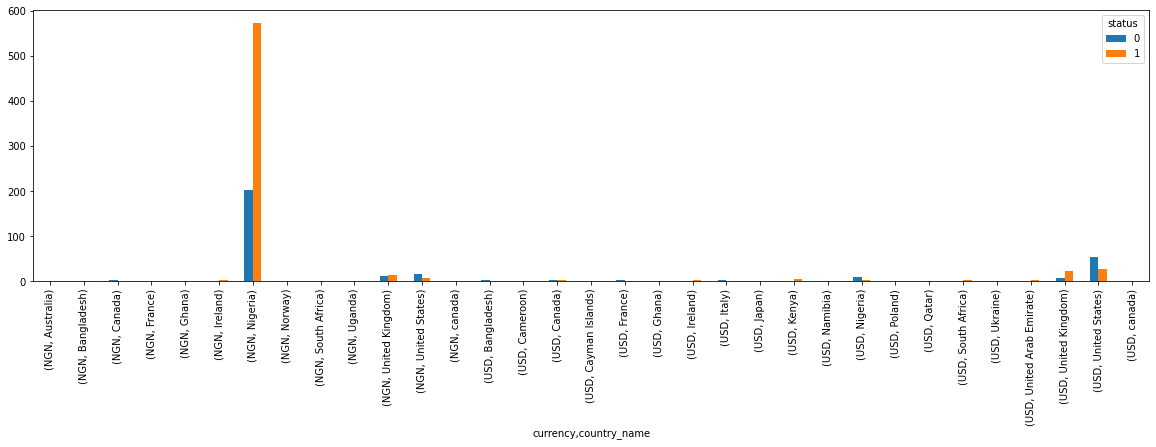

In [62]:
df2.groupby(["currency", "country_name", "status"]).size().unstack().apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='status,currency,country_name'>

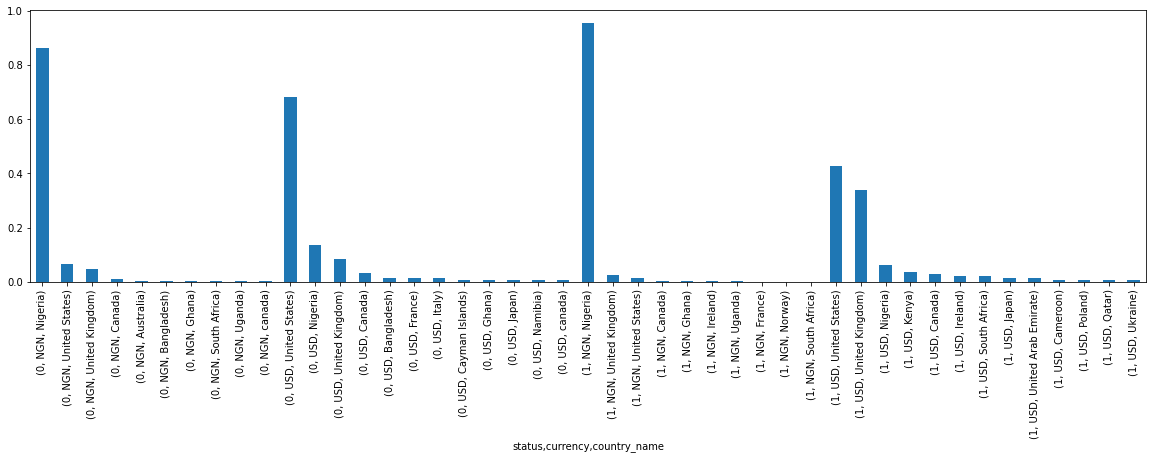

In [63]:
df2.groupby(['status', 'currency']).country_name.value_counts(normalize=True).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='currency,country_name,status'>

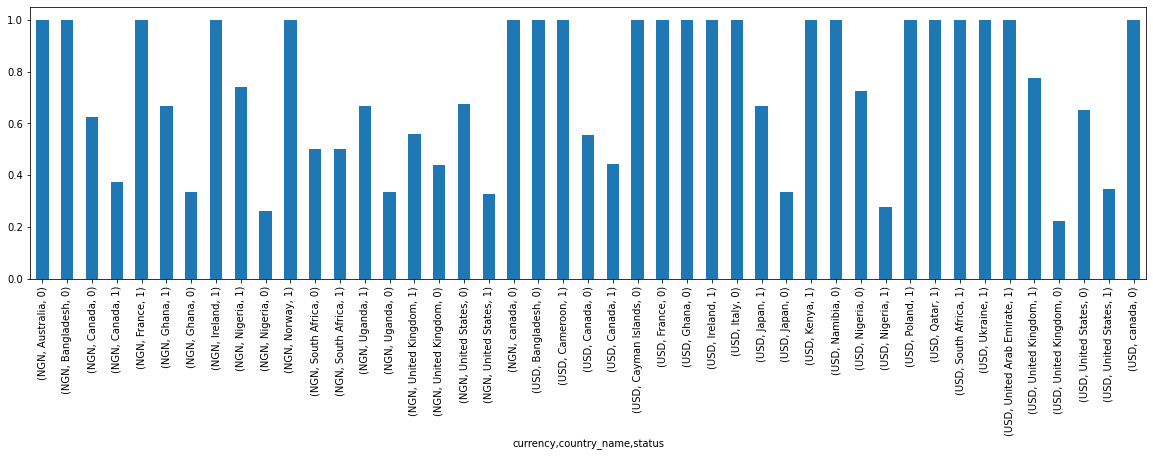

In [64]:
df2.groupby(['currency', 'country_name']).status.value_counts(normalize=True).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='currency,status'>

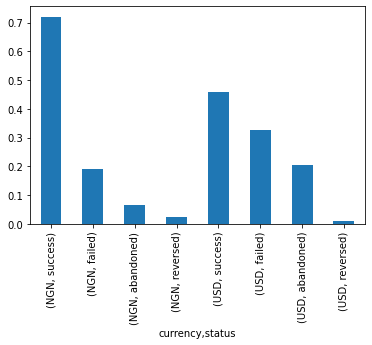

In [65]:
df.groupby('currency').status.value_counts(normalize=True).plot(kind='bar')

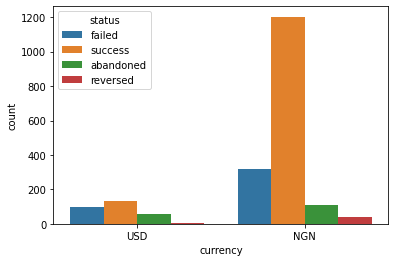

In [66]:
sns.countplot(x=df['currency'], hue=df['status']);

<AxesSubplot:xlabel='country_name,currency'>

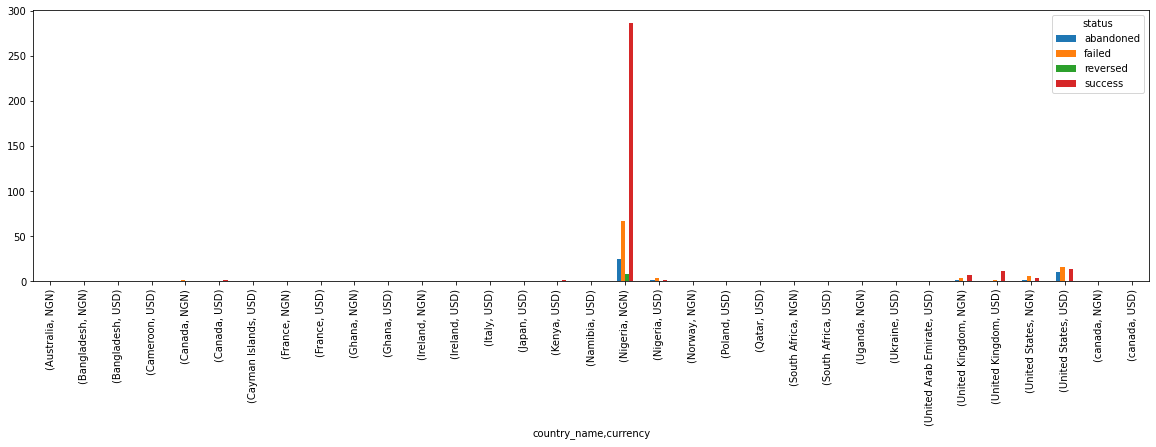

In [67]:
df.groupby(["country_name", "currency", "status"]).size().unstack().fillna(0).apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

# Recommendations
My recommendations for Stears' product strategy based on the insights you gained from the data analysis.
1. I will recommend that data validation is ensured to improve the quality and completeness of the data collected. There are too many empty and null entries in the dataset. This can be greatly ameliorated, if not completely eradicated.
2. I will recommend that more variables are provided for easier and richer analysis.
3. I will recommend that more currencies are added to ease payment by subscribers, especially international subscribers as the international customer base is growing rapidly.
4. I will recommend that the currencies are made more visible on the product’s platforms, website, and mobile App.
